In [1]:
import pandas as pd
import csv
from datetime import datetime 
import matplotlib.pyplot as plt

In [2]:
# The path to our CSV file
file = "Resources/daily_area.csv.txt"

# Read our purchase data into pandas
df = pd.read_csv(file,delim_whitespace=True)

df.rename(columns={"YYYY": "Year", "MM": "Month", "DD":"Day"},inplace = True)
df.head()

,Year,Month,Day,Total,North,South
0,1874,5,1,-1.0,-1.0,-1.0
1,1874,5,2,-1.0,-1.0,-1.0
2,1874,5,3,-1.0,-1.0,-1.0
3,1874,5,4,-1.0,-1.0,-1.0
4,1874,5,5,-1.0,-1.0,-1.0


In [3]:
# Remove row with missing readings (represented as -1)
df = df.loc[df['Total'] != '-1.0'].reset_index(drop=True)
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Year,Month,Day,Total,North,South
0,1874,5,1,-1.0,-1.0,-1.0
1,1874,5,2,-1.0,-1.0,-1.0
2,1874,5,3,-1.0,-1.0,-1.0
3,1874,5,4,-1.0,-1.0,-1.0
4,1874,5,5,-1.0,-1.0,-1.0


In [4]:
sunspots= df.loc[df["Year"] > 2013, [
    "Year", "Month", "Day","Total","North","South"]]
sunspots.head()

,Year,Month,Day,Total,North,South
51014,2014,1,1,686.0,28.0,658.0
51015,2014,1,2,854.0,28.0,826.0
51016,2014,1,3,1974.0,56.0,1918.0
51017,2014,1,4,2198.0,56.0,2142.0
51018,2014,1,5,2394.0,70.0,2324.0


In [5]:
#sunspots.set_index(["Year"], inplace = True, 
                    #append = True, drop = True) 
#sunspots.head()

In [6]:
#Output to a CSV file
sunspots.to_csv("output/sunspot_2014_19.csv")
    

In [7]:
#Converting Year,Month,DAy to Date
months = []
for i,row in sunspots.iterrows():
    months.append(datetime(int(row['Year']),int(row['Month']), 1).strftime("%Y-%m-%d"))
                

In [8]:
unique_months = {}
for month in months:
    if month not in unique_months.keys():
        unique_months[month]=0
print(unique_months)



{'2014-01-01': 0, '2014-02-01': 0, '2014-03-01': 0, '2014-04-01': 0, '2014-05-01': 0, '2014-06-01': 0, '2014-07-01': 0, '2014-08-01': 0, '2014-09-01': 0, '2014-10-01': 0, '2014-11-01': 0, '2014-12-01': 0, '2015-01-01': 0, '2015-02-01': 0, '2015-03-01': 0, '2015-04-01': 0, '2015-05-01': 0, '2015-06-01': 0, '2015-07-01': 0, '2015-08-01': 0, '2015-09-01': 0, '2015-10-01': 0, '2015-11-01': 0, '2015-12-01': 0, '2016-01-01': 0, '2016-02-01': 0, '2016-03-01': 0, '2016-04-01': 0, '2016-05-01': 0, '2016-06-01': 0, '2016-07-01': 0, '2016-08-01': 0, '2016-09-01': 0, '2016-10-01': 0, '2016-11-01': 0, '2016-12-01': 0, '2017-01-01': 0, '2017-02-01': 0, '2017-03-01': 0, '2017-04-01': 0, '2017-05-01': 0, '2017-06-01': 0, '2017-07-01': 0, '2017-08-01': 0, '2017-09-01': 0, '2017-10-01': 0, '2017-11-01': 0, '2017-12-01': 0, '2018-01-01': 0, '2018-02-01': 0, '2018-03-01': 0, '2018-04-01': 0, '2018-05-01': 0, '2018-06-01': 0, '2018-07-01': 0, '2018-08-01': 0, '2018-09-01': 0, '2018-10-01': 0, '2018-11-01':

In [9]:
#Adding Totals to Dates
for i, row in sunspots.iterrows():
    unique_months[datetime(int(row['Year']),int(row['Month']), 1).strftime("%Y-%m-%d")] = unique_months[datetime(int(row['Year']),int(row['Month']), 1).strftime("%Y-%m-%d")] + row['Total']
print(unique_months)

{'2014-01-01': 46473.0, '2014-02-01': 56427.0, '2014-03-01': 31822.0, '2014-04-01': 33628.0, '2014-05-01': 29470.0, '2014-06-01': 25928.0, '2014-07-01': 37366.0, '2014-08-01': 24528.0, '2014-09-01': 33376.0, '2014-10-01': 54782.0, '2014-11-01': 36568.0, '2014-12-01': 44646.0, '2015-01-01': 29974.0, '2015-02-01': 15484.0, '2015-03-01': 15897.0, '2015-04-01': 21098.0, '2015-05-01': 19376.0, '2015-06-01': 25214.0, '2015-07-01': 15960.0, '2015-08-01': 22191.4, '2015-09-01': 17808.0, '2015-10-01': 14406.0, '2015-11-01': 11914.0, '2015-12-01': 17640.0, '2016-01-01': 11368.0, '2016-02-01': 11074.0, '2016-03-01': 9184.0, '2016-04-01': 16996.0, '2016-05-01': 15582.0, '2016-06-01': 6622.0, '2016-07-01': 10374.0, '2016-08-01': 8764.0, '2016-09-01': 10969.0, '2016-10-01': 9044.0, '2016-11-01': 2884.0, '2016-12-01': 3038.0, '2017-01-01': 5432.0, '2017-02-01': 2884.0, '2017-03-01': 3024.0, '2017-04-01': 10458.0, '2017-05-01': 2340.8, '2017-06-01': 4158.0, '2017-07-01': 8225.0, '2017-08-01': 10738.0,

In [10]:
#convert dictionary to Dataframe
sunspot_new=pd.DataFrame.from_dict(unique_months,orient='index')
    
sunspot_new.head()

,0
2014-01-01,46473.0
2014-02-01,56427.0
2014-03-01,31822.0
2014-04-01,33628.0
2014-05-01,29470.0


In [11]:
#Renaming Column name
sunspot_new.columns = ['Total']
sunspot_new.head()


,Total
2014-01-01,46473.0
2014-02-01,56427.0
2014-03-01,31822.0
2014-04-01,33628.0
2014-05-01,29470.0


In [12]:
#Resetting Index
sunspot_new.reset_index(inplace=True)

In [13]:
#REname column 1 to Date
sunspot_new.rename(columns={"index": "Date"},inplace=True)
sunspot_new.head()

,Date,Total
0,2014-01-01,46473.0
1,2014-02-01,56427.0
2,2014-03-01,31822.0
3,2014-04-01,33628.0
4,2014-05-01,29470.0


In [14]:
##Adding North Total to Dates
for i, row in sunspots.iterrows():
    unique_months[datetime(int(row['Year']),int(row['Month']), 1).strftime("%Y-%m-%d")] = unique_months[datetime(int(row['Year']),int(row['Month']), 1).strftime("%Y-%m-%d")] + row['North'] 
print(unique_months)

{'2014-01-01': 52353.0, '2014-02-01': 63833.0, '2014-03-01': 42252.0, '2014-04-01': 48790.0, '2014-05-01': 42294.0, '2014-06-01': 35784.0, '2014-07-01': 43148.0, '2014-08-01': 37702.0, '2014-09-01': 44338.0, '2014-10-01': 58184.0, '2014-11-01': 45332.0, '2014-12-01': 54110.0, '2015-01-01': 37352.0, '2015-02-01': 25116.0, '2015-03-01': 19908.0, '2015-04-01': 35294.0, '2015-05-01': 31710.0, '2015-06-01': 42980.0, '2015-07-01': 26502.0, '2015-08-01': 25062.800000000003, '2015-09-01': 22624.0, '2015-10-01': 21756.0, '2015-11-01': 22750.0, '2015-12-01': 27286.0, '2016-01-01': 20678.0, '2016-02-01': 18830.0, '2016-03-01': 15820.0, '2016-04-01': 31108.0, '2016-05-01': 21700.0, '2016-06-01': 8428.0, '2016-07-01': 20146.0, '2016-08-01': 15750.0, '2016-09-01': 20825.0, '2016-10-01': 12866.0, '2016-11-01': 5334.0, '2016-12-01': 4214.0, '2017-01-01': 10850.0, '2017-02-01': 5642.0, '2017-03-01': 5292.0, '2017-04-01': 14574.0, '2017-05-01': 4496.8, '2017-06-01': 8316.0, '2017-07-01': 8526.0, '2017-0

In [15]:
#Converting Dictionary to Dataframe
sunspot_north=pd.DataFrame.from_dict(unique_months,orient='index')
    
sunspot_north.head()

,0
2014-01-01,52353.0
2014-02-01,63833.0
2014-03-01,42252.0
2014-04-01,48790.0
2014-05-01,42294.0


In [16]:
#Rename column 2 to North
sunspot_north.columns = ['North']
sunspot_north.head()

,North
2014-01-01,52353.0
2014-02-01,63833.0
2014-03-01,42252.0
2014-04-01,48790.0
2014-05-01,42294.0


In [17]:
#Reset Index 
sunspot_north.reset_index(inplace=True)


In [18]:
#Rename column 1 to Date
sunspot_north.rename(columns={"index": "Date"},inplace=True)
sunspot_north.head()

,Date,North
0,2014-01-01,52353.0
1,2014-02-01,63833.0
2,2014-03-01,42252.0
3,2014-04-01,48790.0
4,2014-05-01,42294.0


In [19]:
##Adding South Total to Dates
for i, row in sunspots.iterrows():
    unique_months[datetime(int(row['Year']),int(row['Month']), 1).strftime("%Y-%m-%d")] = unique_months[datetime(int(row['Year']),int(row['Month']), 1).strftime("%Y-%m-%d")] + row['South'] 
print(unique_months)

{'2014-01-01': 92946.0, '2014-02-01': 112854.0, '2014-03-01': 63644.0, '2014-04-01': 67256.0, '2014-05-01': 58940.0, '2014-06-01': 51856.0, '2014-07-01': 74732.0, '2014-08-01': 49056.0, '2014-09-01': 66752.0, '2014-10-01': 109564.0, '2014-11-01': 73136.0, '2014-12-01': 89292.0, '2015-01-01': 59948.0, '2015-02-01': 30968.0, '2015-03-01': 31794.0, '2015-04-01': 42196.0, '2015-05-01': 38752.0, '2015-06-01': 50428.0, '2015-07-01': 31920.0, '2015-08-01': 44382.8, '2015-09-01': 35616.0, '2015-10-01': 28812.0, '2015-11-01': 23828.0, '2015-12-01': 35280.0, '2016-01-01': 22736.0, '2016-02-01': 22148.0, '2016-03-01': 18368.0, '2016-04-01': 33992.0, '2016-05-01': 31164.0, '2016-06-01': 13244.0, '2016-07-01': 20748.0, '2016-08-01': 17528.0, '2016-09-01': 21938.0, '2016-10-01': 18088.0, '2016-11-01': 5768.0, '2016-12-01': 6076.0, '2017-01-01': 10864.0, '2017-02-01': 5768.0, '2017-03-01': 6048.0, '2017-04-01': 20916.0, '2017-05-01': 4681.6, '2017-06-01': 8316.0, '2017-07-01': 16450.0, '2017-08-01': 

In [20]:
#Convert Dictionary to Dataframe
sunspot_south=pd.DataFrame.from_dict(unique_months,orient='index')
    
sunspot_south.head()

,0
2014-01-01,92946.0
2014-02-01,112854.0
2014-03-01,63644.0
2014-04-01,67256.0
2014-05-01,58940.0


In [21]:
#Rename column2 to South
sunspot_south.columns = ['South']
sunspot_south.head()

,South
2014-01-01,92946.0
2014-02-01,112854.0
2014-03-01,63644.0
2014-04-01,67256.0
2014-05-01,58940.0


In [22]:
#Reset index
sunspot_south.reset_index(inplace=True)

In [23]:
#Rename column 2 to South
sunspot_south.rename(columns={"index": "Date"},inplace=True)
sunspot_south.head()

,Date,South
0,2014-01-01,92946.0
1,2014-02-01,112854.0
2,2014-03-01,63644.0
3,2014-04-01,67256.0
4,2014-05-01,58940.0


In [24]:
#Merge North and South
final_sunspot = pd.merge(sunspot_north,sunspot_south, on=('Date'))
final_sunspot.head()

,Date,North,South
0,2014-01-01,52353.0,92946.0
1,2014-02-01,63833.0,112854.0
2,2014-03-01,42252.0,63644.0
3,2014-04-01,48790.0,67256.0
4,2014-05-01,42294.0,58940.0


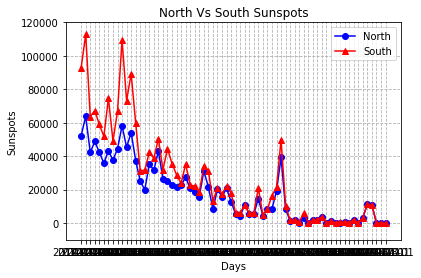

In [36]:
#Plot line graph
x_axis = final_sunspot['Date']
North_plot = plt.plot(x_axis, final_sunspot['North'], marker ='o', color='blue', label="North")
South_plot = plt.plot(x_axis,final_sunspot['South'], marker='^', color='red', label="South")
plt.ylim(-10000,120000)
# Add legend
plt.legend(loc="best")

# Add labels
plt.title('North Vs South Sunspots')
plt.xlabel('Days')
plt.ylabel('Sunspots')
    
# Add gridlines
plt.grid(True,linestyle='dashed')
plt.show() 
